<a href="https://colab.research.google.com/github/mariammouradd/AI-Project/blob/main/model_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [29]:
!ls /content/drive/MyDrive/celebrity_face_project



models	processed  raw	scripts


In [30]:
!ls /content/drive/MyDrive/celebrity_face_project/processed/augmented

lfw  vgg_train	vgg_val


In [31]:
train_dir = "/content/drive/MyDrive/celebrity_face_project/processed/augmented/vgg_train"
val_dir   = "/content/drive/MyDrive/celebrity_face_project/processed/augmented/vgg_val"


In [32]:
!ls /content/drive/MyDrive/celebrity_face_project/processed/augmented/vgg_train


n000002  n000064  n000118  n000172  n000225  n000286  n000342  n000392	n000448
n000005  n000065  n000120  n000176  n000227  n000288  n000343  n000395	n000450
n000007  n000067  n000121  n000179  n000230  n000290  n000344  n000396	n000454
n000008  n000068  n000123  n000181  n000232  n000292  n000345  n000397	n000455
n000010  n000070  n000124  n000182  n000236  n000293  n000347  n000405	n000458
n000011  n000072  n000125  n000183  n000238  n000294  n000348  n000406	n000460
n000015  n000073  n000126  n000185  n000241  n000295  n000350  n000407	n000463
n000016  n000074  n000130  n000189  n000242  n000297  n000351  n000409	n000464
n000017  n000075  n000132  n000190  n000243  n000299  n000353  n000411	n000466
n000018  n000076  n000133  n000192  n000244  n000301  n000354  n000417	n000467
n000021  n000077  n000134  n000193  n000245  n000302  n000355  n000418	n000468
n000022  n000079  n000135  n000194  n000246  n000304  n000356  n000419	n000469
n000024  n000080  n000137  n000195  n000249  n000306

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 173215 images belonging to 295 classes.
Found 43153 images belonging to 295 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=2,
    steps_per_epoch=100,
    validation_steps=20
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 2531s 25s/step - accuracy: 0.0040 - loss: 5.7865 - val_accuracy: 0.0031 - val_loss: 5.6771
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 2401s 24s/step - accuracy: 0.0045 - loss: 5.6918 - val_accuracy: 0.0078 - val_loss: 5.6766


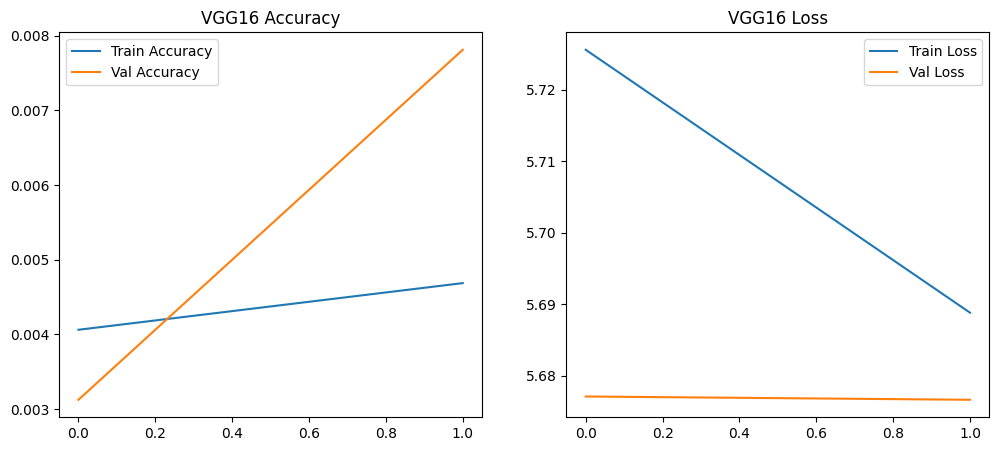

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('VGG16 Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.legend()

plt.show()


In [ ]:
model.save("/content/drive/MyDrive/celebrity_face_project/models/vgg16_model.h5")


In [ ]:
!ls /content/drive/MyDrive/celebrity_face_project/models/


vgg16_model.h5


In [23]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [35]:
img_path = "/content/drive/MyDrive/celebrity_face_project/processed/augmented/vgg_train/n000002/0001_01.jpg_aug0.jpg"

img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(224, 224)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0


In [36]:
last_conv_layer = "block5_conv3"


In [38]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


(np.float64(-0.5), np.float64(13.5), np.float64(13.5), np.float64(-0.5))

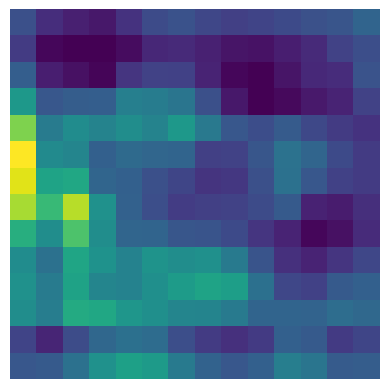

In [39]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer)

import matplotlib.pyplot as plt
plt.imshow(heatmap)
plt.axis("off")


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

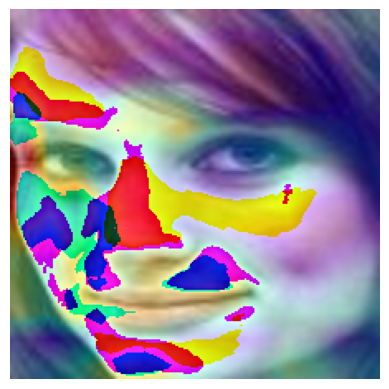

In [40]:
import cv2
import numpy as np

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

heatmap = cv2.resize(heatmap, (224, 224))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

plt.imshow(cv2.cvtColor(superimposed_img.astype("uint8"), cv2.COLOR_BGR2RGB))
plt.axis("off")
